In [2]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
import os

#import the Cross sections file 
openmc.config['cross_sections'] = "/home/f_z/endfb-vii.1-hdf5/cross_sections.xml"

In [15]:
##### How to verify that the sources are working, use of the h5 file
########2d plot of the flux, thermal and fast ##########


def sp_file_output(sp_file):
    
    flux_tally = sp_file.get_tally(scores=['flux'], name='Flux') #instead you can do the same for the flux

    thermal = flux_tally.get_slice(filters=[openmc.EnergyFilter], filter_bins=[((0., 0.68),)])
    fast = flux_tally.get_slice(filters=[openmc.EnergyFilter], filter_bins=[((0.68, 20e6),)])
    
    thermal.mean.shape =(17,17)
    fast.mean.shape =(17,17)

    #exporting the min and max values
    mesh_filter =flux_tally.find_filter(openmc.MeshFilter)
    mesh = mesh_filter.mesh 

    flux_vals = flux_tally.mean.reshape((2, mesh.dimension[0], mesh.dimension[1]))  # 2 energy bins assumed
    
    # [0,:,:] is the thermal part, the fast is [1,:,:]
    thermal_flux = flux_vals[0,:,:].flatten()
    fast_flux = flux_vals[1,:,:].flatten()
    #)(energy,mesh_x,mesh_y)

    return thermal,fast,thermal_flux,fast_flux

sp_file_zircaloy = openmc.StatePoint("./zircaloy_right _enr.h5")
sp_file_fecral = openmc.StatePoint("./fecral_right_enr.h5")

#print(f'keff: {sp_file_fecral.keff:.4f}')

thermal_zirc,fast_zirc,thermal_vals_z,fast_vals_z=sp_file_output(sp_file_zircaloy)
thermal_fecral,fast_fecral,thermal_vals_f,fast_vals_f=sp_file_output(sp_file_fecral) 

print(f'Zircaloy thermal range: {np.min(thermal_zirc.mean):.3f}, {np.max(thermal_zirc.mean):.3f}')
print(f'fecral thermal range: {np.min(thermal_fecral.mean):.3f}, {np.max(thermal_fecral.mean):.3f}')
print(f'Zircqloyl fast range: {np.min(fast_zirc.mean):.3f}, {np.max(fast_zirc.mean):.3f}')
print(f'fecral fast range: {np.min(fast_fecral.mean):.3f}, {np.max(fast_fecral.mean):.3f}')

'''
print(f'Zircaloy thermal range: {(thermal_zirc.std_dev):.3f}')
print(f'fecral thermal range: {(thermal_fecra.std_dev):.3f}')
print(f'Zircqloyl fast range: {(fast_zirc.std_dev):.3f} ')
print(f'fecral fast range: {(fast_fecral.std_dev):.3f}')
'''
#flux_tally = sp_file.get_tally(scores=['flux'], name='Flux') #instead you can do the same for the flux
# Correcting the shape mismatch
#thermal_.mean = thermal_.mean.sum(axis=-1).reshape(25, 25)  # Summing over z bins
#fast_.mean = fast_.mean.sum(axis=-1).reshape(25, 25)
 #(.error)

plt.rcParams['figure.figsize'] = [20, 20]

fig1 = plt.subplot(221)
fig1 = plt.imshow(thermal_zirc.mean, label="E < 1 keV")
bar1=plt.colorbar(location="bottom")
bar1.set_label("Neutrons Flux [cm] ", fontsize=12)
plt.title("Neutrons Flux for E <0.68 eV")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.subplots_adjust(wspace=0.05, hspace=0.03)

fig2 = plt.subplot(222)
fig2 = plt.imshow(fast_zirc.mean, label="E < 1 keV")
bar2=plt.colorbar(location="bottom")
bar2.set_label("Neutrons Flux [cm] ", fontsize=12)
plt.title("Neutrons Flux for E >0.68 eV")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.subplots_adjust(wspace=0.05, hspace=0.03)

fig3 = plt.subplot(223)
fig3 = plt.imshow(thermal_fecral.mean, label="E < 1 keV")
bar3=plt.colorbar(location="bottom")
bar3.set_label("Neutrons Flux [cm] ", fontsize=12)
plt.title("Neutrons Flux for E <0.68 eV")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.subplots_adjust(wspace=0.05, hspace=0.03)

fig4 = plt.subplot(224)
fig4 = plt.imshow(fast_fecral.mean, label="E < 1 keV")
bar4=plt.colorbar(location="bottom")
bar4.set_label("Neutrons Flux [cm] ", fontsize=12)
plt.title("Neutrons Flux for E >0.68 eV")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.subplots_adjust(wspace=0.05, hspace=0.03)
#fig2.imshow(fr2.mean, label="E > 800 keV")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './zircaloy_right_enr.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
#fission_tally=sp_file.get_tally(id=3)
#
### Evaluate the ppf###

ppf_tally = sp_file_zircaloy.get_tally(id=2)
fission_power = ppf_tally.get_values()

norm_z_tally = sp_file_zircaloy.get_tally(id=2)
norm_z_power =norm_z_tally.get_values()
norm_z=norm_z_power.sum()/264
norm_max=norm_z_power.max()

norm_ppf=norm_max/norm_z
#the avg power of zircaloy bundle

max_power = fission_power.max()
avg_power = fission_power.sum()/264 
ppf = max_power / avg_power
ppf_feoverz=ppf/norm_ppf

#print(fission_power.shape)
print(f'Power Peaking Factor: {ppf:.3f}')
print(f'MAx_power: {max_power:.4f}')
print(f'avg_power: {avg_power:.4f}')
print(f'Power Peaking Factor Zircaloy: {norm_ppf:.3f}')
print(f'ppf fecral: {ppf:.3f}')
print(f'normalized ppf: {ppf_feoverz:.3f}')


Power Peaking Factor: 1.052
MAx_power: 439497.6876
avg_power: 417818.4245
Power Peaking Factor Zircaloy: 1.052
ppf fecral: 1.052
normalized ppf: 1.000


Len of the coordinates array along x/y 17
Values inside the arrays [-10.71     -9.37125  -8.0325   -6.69375  -5.355    -4.01625  -2.6775
  -1.33875   0.        1.33875   2.6775    4.01625   5.355     6.69375
   8.0325    9.37125  10.71   ]
Flux reshaped in the grid (17, 17)
PPF = 0.925 at (X=-9.37, Y=-8.03)
PPF = 0.931 at (X=-9.37, Y=8.03)
PPF = 0.933 at (X=-8.03, Y=-9.37)
PPF = 0.934 at (X=9.37, Y=8.03)
PPF = 0.934 at (X=8.03, Y=9.37)
PPF = 0.934 at (X=2.68, Y=9.37)
PPF = 0.936 at (X=2.68, Y=-9.37)
PPF = 0.936 at (X=9.37, Y=1.34)
PPF = 0.936 at (X=9.37, Y=2.68)
PPF = 0.937 at (X=-8.03, Y=9.37)


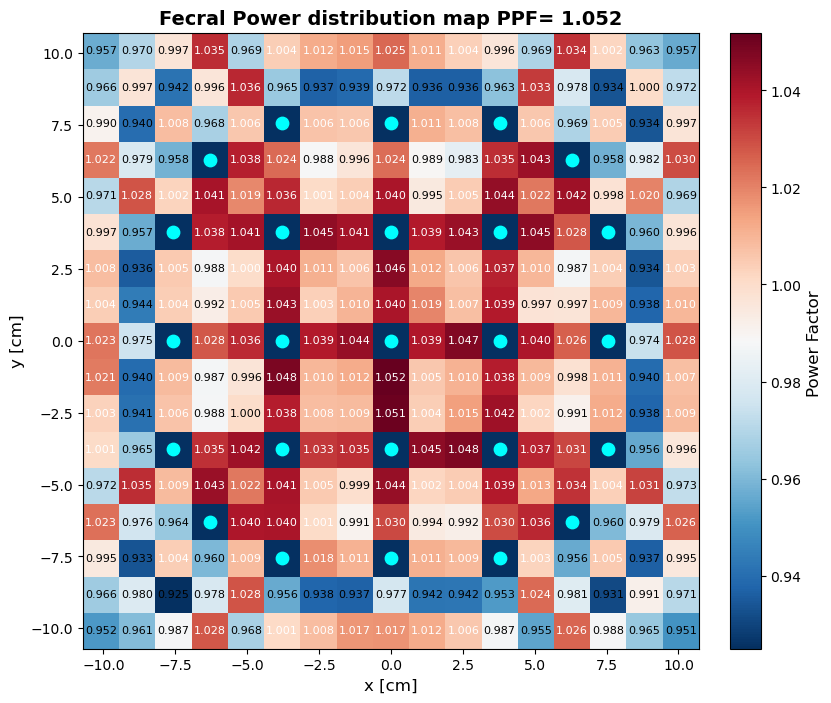

In [9]:
#############Plot power distribution map#################

sp_file_zircaloy = openmc.StatePoint("./zircaloy_right _enr.h5")
sp_file_fecral = openmc.StatePoint("./fecral_right_enr.h5")

power_tally = sp_file_zircaloy.get_tally(id=2)
fission_power = power_tally.get_values()

max_power = fission_power.max()
avg_power = fission_power.sum()/264 
ppf = max_power / avg_power

flux_tally=sp_file_fecral.get_tally(id=1)
flux_values = flux_tally.get_values().flatten()  # collapses the multidim array inro one dimension
#print("Flux values tally dimension:",flux_values.shape) # as you can see the tally is redefined as a one dim array
thermal_flux_values = flux_values[:289]
#print(thermal_flux_values)
# export the mesh
mesh_filter =flux_tally.find_filter(openmc.MeshFilter)
mesh = mesh_filter.mesh 
#print("Mesh tally:",type(mesh)) #is a  class: 'openmc.mesh.RegularMesh' 

# the coordinates for the mesh
x_vals = np.linspace(mesh.lower_left[0], mesh.upper_right[0], mesh.dimension[0])
y_vals = np.linspace(mesh.lower_left[1], mesh.upper_right[1], mesh.dimension[1])
#print("Len of the coordinates array along x/y",len(x_vals)) #x and y are arrays defined as (starting value, final value, number of subintervals)
#print("Values inside the arrays",x_vals) # the coordinates are thus defined as (-bundle_pitch/2,bundle_pitch/2, 17)

# Reshape flux data to match mesh grid, passes from 289->17x17
flux_grid = thermal_flux_values.reshape(mesh.dimension[0], mesh.dimension[1])
#print("Flux reshaped in the grid",flux_grid.shape)

#flux vs location
#Plotting the peaking factors and power distribution maps
#creating the list of power peak per each coordinates
#power vs location, already imported in fission_power 

guide_tubes_pos = np.array([
                  [2, 5],   [2, 8],   [2, 11],
             [3, 3],                        [3, 13],
        [5, 2],   [5, 5],   [5, 8],   [5, 11],    [5, 14],
        [8, 2],   [8, 5],   [8, 8],   [8, 11],    [8, 14],
        [11, 2],  [11, 5],  [11, 8],  [11, 11],   [11, 14],
             [13, 3],                       [13, 13],
                  [14, 5],  [14, 8],  [14, 11]
    ])

fission_power.flatten()  # collapses the multidim array inro one dimension

# export the mesh
mesh_filter =power_tally.find_filter(openmc.MeshFilter)
mesh = mesh_filter.mesh 
#print("Mesh tally:",type(mesh)) #is a  class: 'openmc.mesh.RegularMesh' 

# the coordinates for the mesh
x_vals = np.linspace(mesh.lower_left[0], mesh.upper_right[0], mesh.dimension[0])
y_vals = np.linspace(mesh.lower_left[1], mesh.upper_right[1], mesh.dimension[1])
print("Len of the coordinates array along x/y",len(x_vals)) #x and y are arrays defined as (starting value, final value, number of subintervals)
print("Values inside the arrays",x_vals) # the coordinates are thus defined as (-bundle_pitch/2,bundle_pitch/2, 17)

# Reshape flux data to match mesh grid, passes from 289->17x17
power_grid = fission_power.reshape(mesh.dimension[0], mesh.dimension[1])
print("Flux reshaped in the grid",power_grid.shape)
#print(power_grid)
# Mask guide tube positions in the PPF grid
ppf_grid = power_grid / avg_power 
masked_ppf_values = []

for i in range(mesh.dimension[0]):
    for j in range(mesh.dimension[1]):
        if not any((guide_tubes_pos == [i, j]).all(axis=1)):
            masked_ppf_values.append(ppf_grid[i, j])

masked_ppf_values = np.array(masked_ppf_values)

# Set color scale limits based only on fuel regions
vmin = masked_ppf_values.min()
vmax = masked_ppf_values.max()

ppf_list = []
for i in range(mesh.dimension[0]):
    for j in range(mesh.dimension[1]):
        
        if not any((guide_tubes_pos == [i, j]).all(axis=1)):
            ppf_value = ppf_grid[i, j]
            x_coord = x_vals[i]
            y_coord = y_vals[j]
            ppf_list.append((ppf_value, (x_coord, y_coord)))

# Sort list by highest PPF value (descending order)
ppf_list.sort( key=lambda x: x[0])#,reverse=True)

# Print top regions with highest PPF
for i in range(10):  # Show top 10 high-power locations
    print(f"PPF = {ppf_list[i][0]:.3f} at (X={ppf_list[i][1][0]:.2f}, Y={ppf_list[i][1][1]:.2f})")
#print(ppf_list)

fig, ax = plt.subplots(figsize=(10, 8))  


# Choose an improved colormap
cmap =  "RdBu_r"#'YlOrBr'  # Alternatives: "cividis", "plasma", "viridis"

# Plot the heatmap
img = ax.imshow(ppf_grid, cmap=cmap, origin="lower",
                extent=[mesh.lower_left[0], mesh.upper_right[0],
                        mesh.lower_left[1], mesh.upper_right[1]], vmin=vmin, vmax=vmax)

# Add colorbar with better positioning
cbar = plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Power Factor ", fontsize=12)

# Compute proper text positions
x_centers = np.linspace(mesh.lower_left[0], mesh.upper_right[0], mesh.dimension[0], endpoint=False) + (mesh.upper_right[0] - mesh.lower_left[0]) / (2 * mesh.dimension[0])
y_centers = np.linspace(mesh.lower_left[1], mesh.upper_right[1], mesh.dimension[1], endpoint=False) + (mesh.upper_right[1] - mesh.lower_left[1]) / (2 * mesh.dimension[1])

# Annotate PPF values inside each cell
for i in range(mesh.dimension[0]):
    for j in range(mesh.dimension[1]):
        if any((guide_tubes_pos == [i, j]).all(axis=1)):  
            continue  # Skip guide tube locations
        ax.text(x_centers[i], y_centers[j], f"{ppf_grid[j, i]:.3f}",  # Swap indices if needed
                ha='center', va='center', fontsize=8, 
                color="black" if ppf_grid[j, i] < 1.0 else "white")  # Adaptive text color

# Overlay guide tube positions
if 'guide_tubes_pos' in locals():
    gt_x = x_centers[guide_tubes_pos[:, 0]]
    gt_y = y_centers[guide_tubes_pos[:, 1]]
    ax.scatter(gt_x, gt_y, color="cyan", s=80, label="Guide Tube")

# Labels and title
ax.set_xlabel("x [cm]", fontsize=12)
ax.set_ylabel("y [cm]", fontsize=12)
ax.set_title(f"Fecral Power distribution map PPF= {ppf:.3f}", fontsize=14, fontweight='bold')

plt.show()

normalized thermal range: 0.987, 1.000


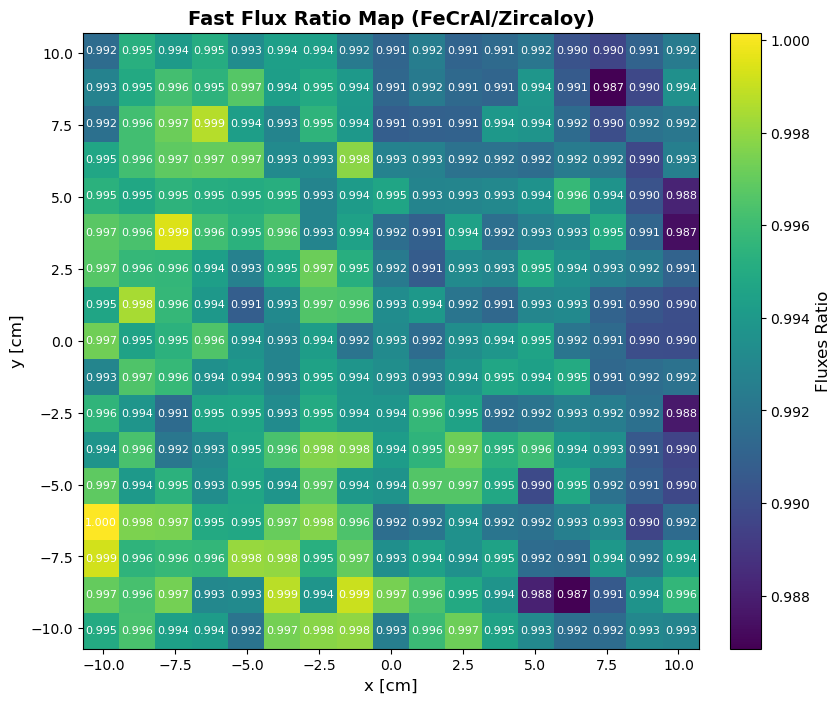

/tmp/ipykernel_2161/1929752166.py:100: RuntimeWarning: invalid value encountered in divide
  power_ratio = power_fecral / power_zircaloy


normalized thermal range: 0.914, 0.954


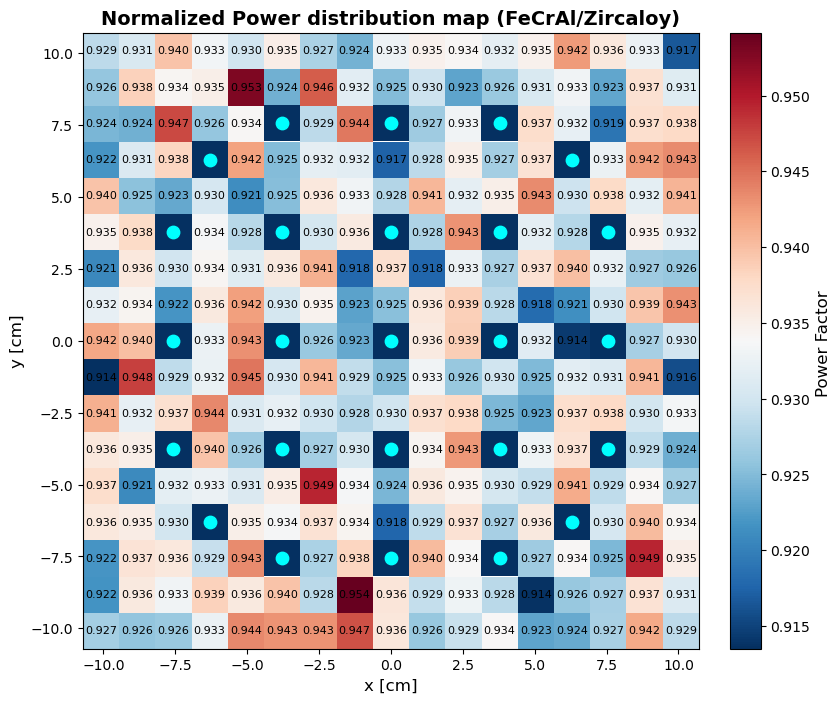

In [14]:
###normalized power and flux maps

#print("Mesh tally:",type(mesh)) #is a  class: 'openmc.mesh.RegularMesh' 

sp_file_zircaloy = openmc.StatePoint("./zircaloy_normal_geom.h5")
sp_file_fecral = openmc.StatePoint("./fecral_normal_geom.h5")

# Estrarre la tally di flusso da entrambi i file
flux_tally_fecral = sp_file_fecral.get_tally(name='Flux')
flux_tally_zircaloy = sp_file_zircaloy.get_tally(name='Flux')

mesh_filter_f =flux_tally_fecral.find_filter(openmc.MeshFilter)
mesh_f = mesh_filter_f.mesh 

mesh_filter_z =flux_tally_zircaloy.find_filter(openmc.MeshFilter)
mesh_z = mesh_filter_f.mesh 

# Estrazione dei valori di flusso multidimensionali (energia, x, y)
flux_vals_fecral = flux_tally_fecral.mean.reshape((2, mesh_f.dimension[0], mesh_f.dimension[1]))  # 2 energy bins assumed
flux_vals_zircaloy = flux_tally_zircaloy.mean.reshape((2, mesh_z.dimension[0], mesh_z.dimension[1]))


# [0,:,:] is the thermal part, the fast is [1,:,:]
flux_tot_fecral = flux_vals_fecral[1,:,:]
flux_tot_zircaloy = flux_vals_zircaloy[1,:,:]


# Calcolo del rapporto cella per cella
flux_ratio = flux_tot_fecral / flux_tot_zircaloy


print(f'normalized thermal range: {np.min(flux_ratio):.3f}, {np.max(flux_ratio):.3f}')
# Assuming these are already defined:
# mesh, x_vals, y_vals, guide_tubes_pos (positions to mask), flux_ratio (mesh_dim x mesh_dim)
# Set color scale limits based on fuel regions (exclude guide tubes)
vmin = flux_ratio.min()
vmax = flux_ratio.max()

fig, ax = plt.subplots(figsize=(10, 8))

cmap = "viridis"  # same colormap for consistency

# Plot heatmap of flux ratio
img = ax.imshow(flux_ratio, cmap=cmap, origin="lower",
                extent=[mesh_f.lower_left[0], mesh_f.upper_right[0],
                        mesh_f.lower_left[1], mesh_f.upper_right[1]],
                vmin=vmin, vmax=vmax)

# Add colorbar
cbar = plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Fluxes Ratio", fontsize=12)

# Compute center positions for text annotations
x_centers = np.linspace(mesh_f.lower_left[0], mesh_f.upper_right[0], mesh_f.dimension[0], endpoint=False) + (mesh_f.upper_right[0] - mesh_f.lower_left[0]) / (2 * mesh_f.dimension[0])
y_centers = np.linspace(mesh_f.lower_left[1], mesh_f.upper_right[1], mesh_f.dimension[1], endpoint=False) + (mesh_f.upper_right[1] - mesh_f.lower_left[1]) / (2 * mesh_f.dimension[1])

# Annotate flux ratio values inside each cell (skip guide tubes)
for i in range(mesh.dimension[0]):
    for j in range(mesh.dimension[1]):
        val = flux_ratio[j, i]  # watch index order: (y, x)
        ax.text(x_centers[i], y_centers[j], f"{val:.3f}",
                ha='center', va='center', fontsize=8,color= "white")

# Labels and title
ax.set_xlabel("x [cm]", fontsize=12)
ax.set_ylabel("y [cm]", fontsize=12)
ax.set_title("Fast Flux Ratio Map (FeCrAl/Zircaloy)", fontsize=14, fontweight='bold')

plt.show()

###################################
#################################
##################################
#power 
# Estrarre la tally di flusso da entrambi i file
guide_tubes_pos = np.array([
                  [2, 5],   [2, 8],   [2, 11],
             [3, 3],                        [3, 13],
        [5, 2],   [5, 5],   [5, 8],   [5, 11],    [5, 14],
        [8, 2],   [8, 5],   [8, 8],   [8, 11],    [8, 14],
        [11, 2],  [11, 5],  [11, 8],  [11, 11],   [11, 14],
             [13, 3],                       [13, 13],
                  [14, 5],  [14, 8],  [14, 11]
    ])
fission_tally_fecral = sp_file_fecral.get_tally(id=2)
fission_tally_zircaloy = sp_file_zircaloy.get_tally(id=2)

# Estrazione dei valori di flusso multidimensionali (energia, x, y)
fission_fecral=fission_tally_fecral.get_values()
fission_zircaloy=fission_tally_zircaloy.get_values()
#print(fission_tally_zircaloy.std_dev)

power_vals_fecral = fission_fecral.flatten()  # 2 energy bins assumed
power_vals_zircaloy = fission_zircaloy.flatten()

power_fecral=power_vals_fecral.reshape(mesh_f.dimension[0], mesh_f.dimension[1])
power_zircaloy = power_vals_zircaloy.reshape(mesh_z.dimension[0], mesh_z.dimension[1])

# Calcolo del rapporto cella per cella
power_ratio = power_fecral / power_zircaloy
#print(power_fecral)
power_values=[]

for i in range(mesh_f.dimension[0]):
    for j in range(mesh_f.dimension[1]):
        
        if not any((guide_tubes_pos == [i, j]).all(axis=1)):
            power_value = power_ratio[i, j]
            power_values.append(power_value)


# Assuming these are already defined:
# mesh, x_vals, y_vals, guide_tubes_pos (positions to mask), power_ratio (mesh_dim x mesh_dim)
x_vals = np.linspace(mesh_f.lower_left[0], mesh_f.upper_right[0], mesh_f.dimension[0])
y_vals = np.linspace(mesh_f.lower_left[1], mesh_f.upper_right[1], mesh_f.dimension[1])
masked_power_values = []

for i in range(mesh_f.dimension[0]):
    for j in range(mesh_f.dimension[1]):
        if not any((guide_tubes_pos == [i, j]).all(axis=1)):
            masked_power_values.append(power_ratio[i, j])

print(f'normalized thermal range: {np.min(power_values):.3f}, {np.max(power_values):.3f}')
'''
from uncertainties import ufloat

# Step 1: Calculate ratio ignoring guide tubes
mask = np.zeros(mesh_f.dimension, dtype=bool)
for pos in guide_tubes_pos:
    mask[pos[0], pos[1]] = True

ratio = np.divide(power_fecral, power_zircaloy)
masked_ratio = np.ma.array(ratio, mask=mask)

# Step 2: Find min and max indices of ratio ignoring guide tubes
min_idx = np.unravel_index(masked_ratio.argmin(), masked_ratio.shape)
max_idx = np.unravel_index(masked_ratio.argmax(), masked_ratio.shape)

print(f"Min ratio at {min_idx} = {ratio[min_idx]:.4f}")
print(f"Max ratio at {max_idx} = {ratio[max_idx]:.4f}")

# Step 3: Get std dev arrays for both materials
std_dev_vals_f = fission_tally_fecral.std_dev.flatten()
std_dev_mesh_f = std_dev_vals_f.reshape(mesh_f.dimension[0], mesh_f.dimension[1])

std_dev_vals_z = fission_tally_zircaloy.std_dev.flatten()
std_dev_mesh_z = std_dev_vals_z.reshape(mesh_f.dimension[0], mesh_f.dimension[1])

# Step 4: Build ufloats at min and max positions
fecral_min = ufloat(power_fecral[min_idx], std_dev_mesh_f[min_idx])
zircaloy_min = ufloat(power_zircaloy[min_idx], std_dev_mesh_z[min_idx])
ratio_min = fecral_min / zircaloy_min

fecral_max = ufloat(power_fecral[max_idx], std_dev_mesh_f[max_idx])
zircaloy_max = ufloat(power_zircaloy[max_idx], std_dev_mesh_z[max_idx])
ratio_max = fecral_max / zircaloy_max

print(f"Min ratio with uncertainty at {min_idx} = {ratio_min}")
print(f"Max ratio with uncertainty at {max_idx} = {ratio_max}")
'''
##############
##############
##############
##############
masked_power_values = np.array(masked_power_values)

# Set color scale limits based only on fuel regions
vmin = masked_power_values.min()
vmax = masked_power_values.max()

power_list = []
for i in range(mesh_f.dimension[0]):
    for j in range(mesh_f.dimension[1]):
        
        if not any((guide_tubes_pos == [i, j]).all(axis=1)):
            power_value = power_ratio[i, j]
            x_coord = x_vals[i]
            y_coord = y_vals[j]
            power_list.append((power_value, (x_coord, y_coord)))

# Sort list by highest PPF value (descending order)
power_list.sort( key=lambda x: x[0])#,reverse=True)

fig, ax = plt.subplots(figsize=(10, 8))  

# Choose an improved colormap
cmap =  "RdBu_r"#'YlOrBr'  # Alternatives: "cividis", "plasma", "viridis"

# Plot the heatmap
img = ax.imshow(power_ratio, cmap=cmap, origin="lower",
                extent=[mesh_f.lower_left[0], mesh_f.upper_right[0],
                        mesh_f.lower_left[1], mesh_f.upper_right[1]], vmin=vmin, vmax=vmax)

# Add colorbar with better positioning
cbar = plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Power Factor ", fontsize=12)

# Compute proper text positions
x_centers = np.linspace(mesh_f.lower_left[0], mesh_f.upper_right[0], mesh_f.dimension[0], endpoint=False) + (mesh_f.upper_right[0] - mesh_f.lower_left[0]) / (2 * mesh_f.dimension[0])
y_centers = np.linspace(mesh_f.lower_left[1], mesh_f.upper_right[1], mesh_f.dimension[1], endpoint=False) + (mesh_f.upper_right[1] - mesh_f.lower_left[1]) / (2 * mesh_f.dimension[1])

import matplotlib.patches as patches
import matplotlib.colors as mcolors
# Overlay guide tube positions

# Get colormap and normalize instance
cmap_obj = plt.get_cmap(cmap)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Get color corresponding to minimum value of power_ratio
min_color = cmap_obj(norm(vmin))

# Draw filled rectangles at guide tube positions
for pos in guide_tubes_pos:
    i, j = pos
    # Calculate rectangle lower left corner coordinates (use x_centers and y_centers)
    # Since x_centers and y_centers mark cell centers, compute corner by subtracting half cell width/height
    cell_width = (mesh_f.upper_right[0] - mesh_f.lower_left[0]) / mesh_f.dimension[0]
    cell_height = (mesh_f.upper_right[1] - mesh_f.lower_left[1]) / mesh_f.dimension[1]

    rect_x = x_centers[i] - cell_width / 2
    rect_y = y_centers[j] - cell_height / 2

    rect = patches.Rectangle((rect_x, rect_y), cell_width, cell_height,
                             linewidth=0, edgecolor=None, facecolor=min_color, zorder=5)
    ax.add_patch(rect)

# Annotate PPF values inside each cell
for i in range(mesh_f.dimension[0]):
    for j in range(mesh_f.dimension[1]):
        if any((guide_tubes_pos == [i, j]).all(axis=1)):  
            continue  # Skip guide tube locations
        ax.text(x_centers[i], y_centers[j], f"{power_ratio[j, i]:.3f}",  # Swap indices if needed
                ha='center', va='center', fontsize=8, 
                color="black" if power_ratio[j, i] < 1.0 else "white")  # Adaptive text color

if 'guide_tubes_pos' in locals():
    gt_x = x_centers[guide_tubes_pos[:, 0]]
    gt_y = y_centers[guide_tubes_pos[:, 1]]
    ax.scatter(gt_x, gt_y, color="cyan", s=80, label="Guide Tube",zorder=10)

# Labels and title
ax.set_xlabel("x [cm]", fontsize=12)
ax.set_ylabel("y [cm]", fontsize=12)
ax.set_title(f"Normalized Power distribution map (FeCrAl/Zircaloy)", fontsize=14, fontweight='bold')

plt.show()
# Ora power_ratio è una matrice mesh.dimension[0] x mesh.dimension[1]
